In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import os
import csv
import spacv


import matplotlib.pyplot as plt

from sklearn.model_selection import GroupKFold, cross_val_predict
from sklearn.model_selection import KFold
import geopandas as gpd

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.neural_network import MLPRegressor
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import matplotlib.gridspec as gridspec

from deforestutils import *

from joblib import dump, load
from joblib import Parallel, delayed




/Users/annieulichney/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?it/s]

Base Files setup.
Starting fit for 2004
Read in data for 2004
Years in data: [2004 2005 2006 2007]
Number of rows in data: (665048, 216)


The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
invalid value encountered in true_divide
The `op` parameter is deprecated a

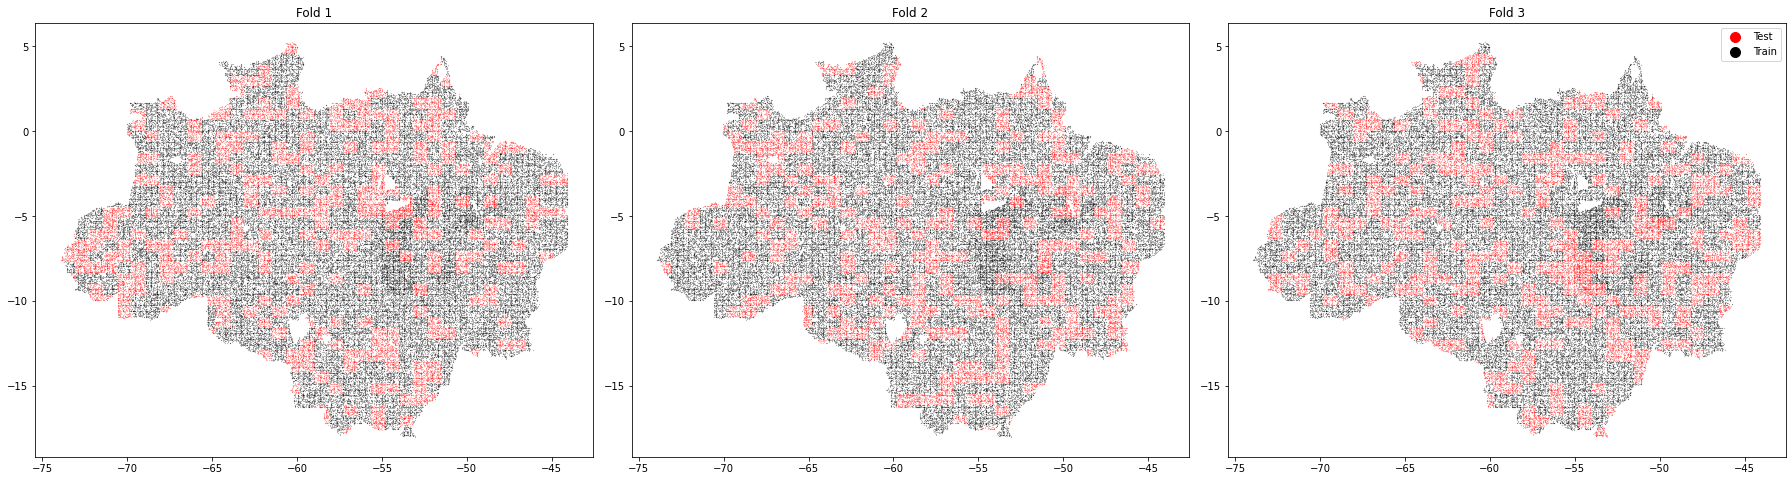

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD0/.


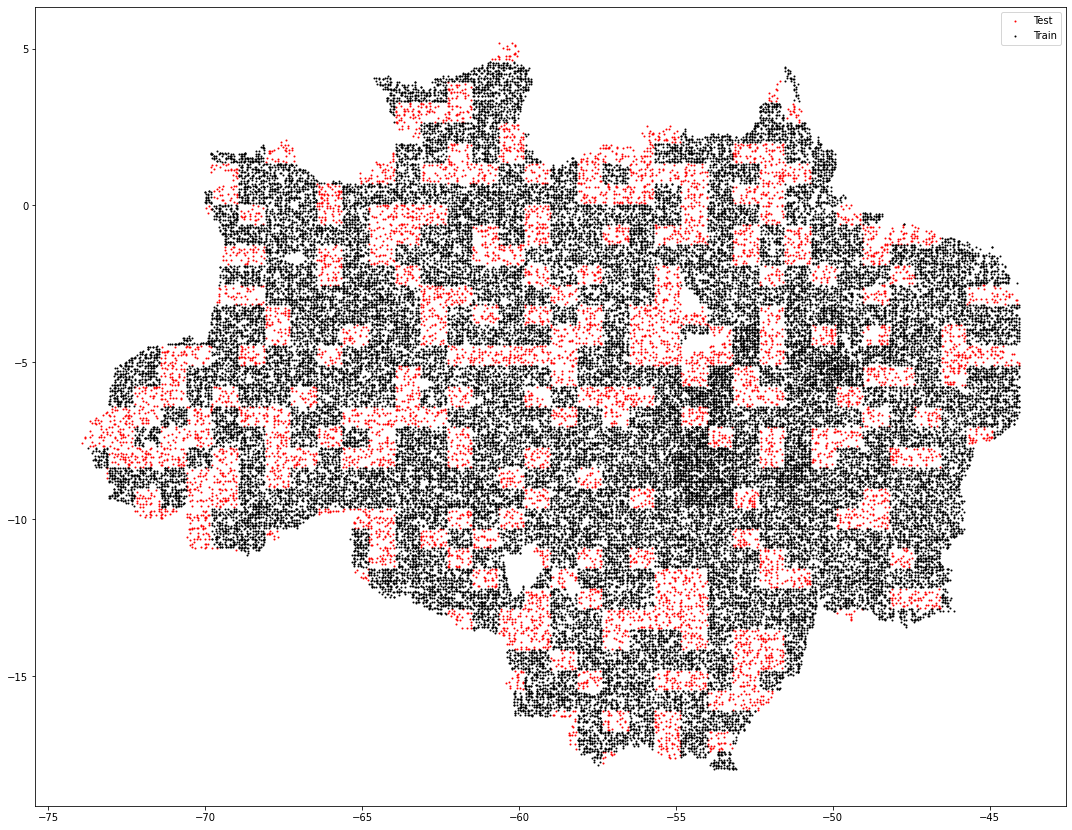

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD1/.


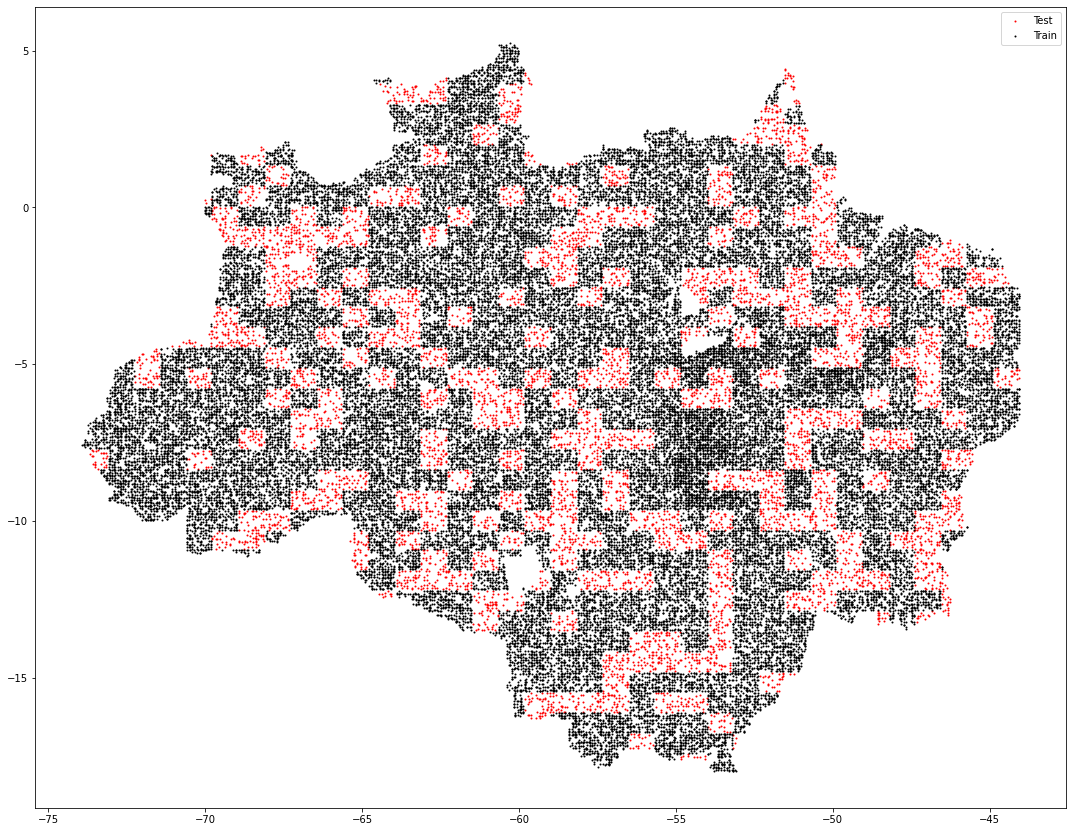

Base Files setup for fold at FeatureImportanceResults/2004_2005_2006_PREDICT_2007/2004_2005_2006_PREDICT_2007_FOLD2/.


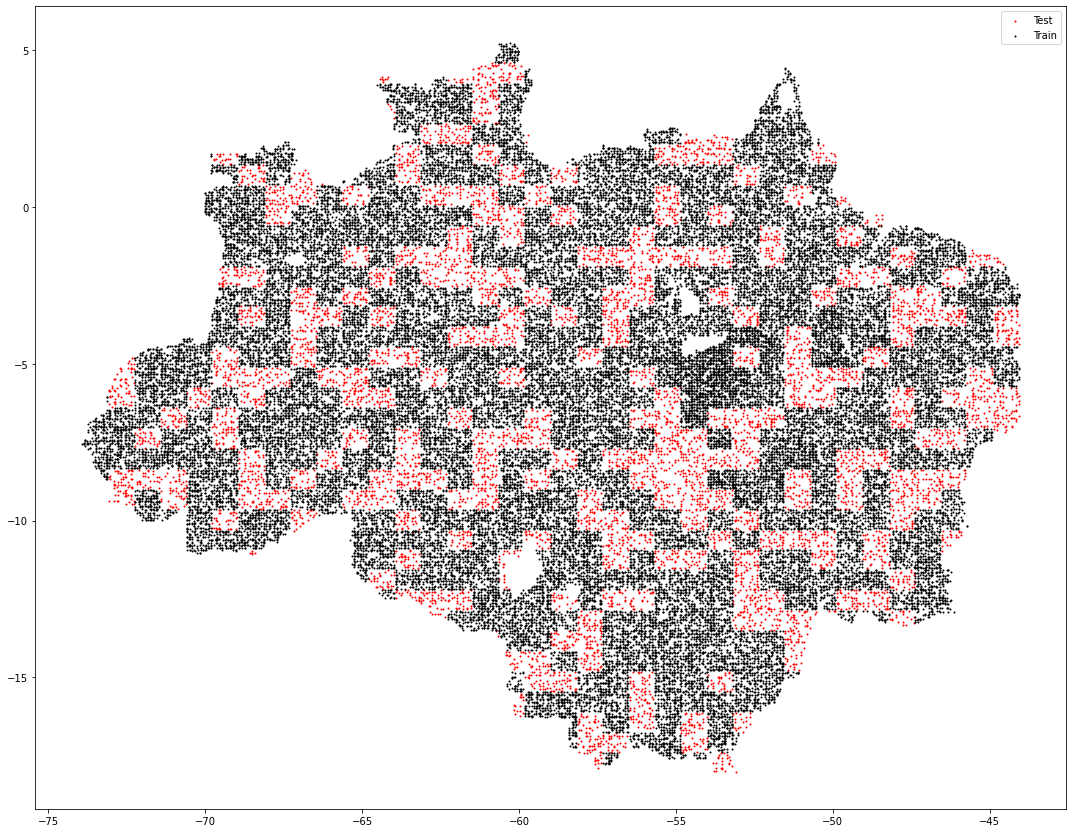

100%|██████████| 1/1 [02:04<00:00, 124.50s/it]


In [4]:
#for year
    #split points into 3 groups with METHOD
    #for i in range 3
        #train all and get feature importsnace
    #average across those 3 results of feature importance..mse..predictions.

first_time = True
GET_NULLS = False
YEAR_LIST = [2004]

RANDOM_FOREST = False
LASSO = False
GRADIENT_BOOSTING = False
SUPER_LEARNER = False
ANALYZE_PREDICTIONS = False
PLOT_FEATURE_IMPORTANCE = False
EVOLUTION = False
MSE = False

PLOT_ENTIRE_AREA = True
PLOT_FOLDS = True

SUBSET = True
SUBSET_SIZE = 100000
BASE_PATH = 'FeatureImportanceResults'
NUMBER_YEARS_TRAIN = 3

CROSS_VALIDTION_METHOD = 'hblock' #random, municipality, spatialkfold, 

#BASE_PATH/ FOLDER_NAME / FOLD_FOLDER_NAME

setup_base_files(BASE_PATH)

for this_start_year in tqdm(YEAR_LIST):
    START_YEAR_TRAIN = this_start_year
    YEARS_TO_TRAIN = [START_YEAR_TRAIN + u  for u in range(NUMBER_YEARS_TRAIN + 1)]
    PREDICT_YEAR = START_YEAR_TRAIN + NUMBER_YEARS_TRAIN
    FOLDER_NAME = ''.join([f'{START_YEAR_TRAIN + u}_' for u in list(range(NUMBER_YEARS_TRAIN))]) + f'PREDICT_{PREDICT_YEAR}'
    print(f'Starting fit for {this_start_year}')
    setup_year_files(BASE_PATH, FOLDER_NAME)

    df_full = get_full_data(START_YEAR_TRAIN, YEARS_TO_TRAIN)

    if SUBSET: df_full = df_full.sample(SUBSET_SIZE).reset_index(drop=True)

    X, Y = split_XY(df_full)

    folds = get_3_fold_test_train(X, Y, df_full, method = CROSS_VALIDTION_METHOD, SAVE = False)
    plot_3_folds(X, df_full, folds, f'{BASE_PATH}/{FOLDER_NAME}', method = CROSS_VALIDTION_METHOD)

    for i in range(3):
        FOLD_PATH = FOLDER_NAME + f'_FOLD{i}'
        FILE_PATH = f'{BASE_PATH}/{FOLDER_NAME}/{FOLD_PATH}'
        setup_fold_files(BASE_PATH, FOLDER_NAME, FOLD_PATH)

        train_inds, test_inds = folds[i]
        X_train, X_test, Y_train, Y_test = split_test_train(df_full, train_inds, test_inds, PREDICT_YEAR, PLOT_ENTIRE_AREA, FILE_PATH)
    

#     X_train, X_test, Y_train, Y_test = split_test_train(df_full, train_inds, test_inds, PREDICT_YEAR, PLOT_ENTIRE_AREA, NEW_INDICES, FILE_PATH, FOLDER_NAME)

#     if NEW_CV_INDICES:
#         muni_cv = get_new_cv(X_train, Y_train, FOLDER_NAME, PLOT_FOLDS, df_full, PREDICT_YEAR, FILE_PATH)
#     if not NEW_CV_INDICES:
#         muni_cv = get_prev_cv(FOLDER_NAME)

#     if GET_NULLS: get_null_count(X_train, FOLDER_NAME)
            
#     X_train = X_train.drop('geometry', axis = 1)
#     X_test = X_test.drop('geometry', axis = 1)
    

#     #random forest
#     if RANDOM_FOREST:
#         randomforest_features_df = train_random_forest(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #lasso 
#     if LASSO:
#         lasso_features_df = train_lasso(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #gradient boosting
#     if GRADIENT_BOOSTING:
#         gradient_boosting_features_df = train_gradient_boost(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)
    
#     #neural network
#     if NEURAL_NETWORKS:
#         nn_features_df = train_neural_network(X_train, Y_train, X_test, Y_test, FILE_PATH, FOLDER_NAME, muni_cv)

#     #super learner ensemble
#     if SUPER_LEARNER:
#         base_learners = get_base_learners(FOLDER_NAME)
#         super_learner_features_df = train_super_learner(X_train, Y_train, X_test, Y_test, FILE_PATH, muni_cv, base_learners, FOLDER_NAME)

#     #visualize
#     if ANALYZE_PREDICTIONS:
#         yhat_list = get_yhat_list(FOLDER_NAME)
#         visualize_predictions(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)
#         visualize_predictions_single_plot(yhat_list, Y_test, FILE_PATH, FOLDER_NAME)

#     if PLOT_FEATURE_IMPORTANCE:
#         for method in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner']:
#             plot_feature_importance(FILE_PATH, FOLDER_NAME, method, use_abs = True)
#             plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

#         plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True)
#         plot_feature_importance_all_methods(X_train, FILE_PATH, FOLDER_NAME, method, SHOW = False, INCLUDE_FOREST = False, use_abs = True)

# if EVOLUTION:
#     #analysis for all years:
#     for method_string in ['randomforest', 'lasso', 'gradientboosting', 'neuralnetwork', 'superlearner', 'avg']:
#         feature_importance_evolution(method_string, INCLUDE_FOREST = False)

# if MSE:
#     plot_MSE()
    

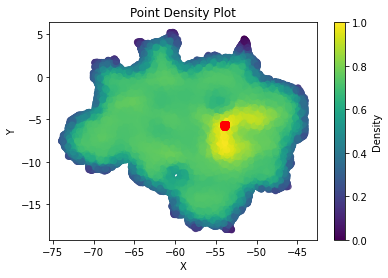

In [5]:
from scipy.stats import gaussian_kde

kde = gaussian_kde([df_full.x, df_full.y])
density = kde([df_full.x, df_full.y])


plt.scatter(df_full.x, df_full.y, c=density, cmap='viridis', alpha=0.7)

# Find the indices of the densest points
densest_indices = np.argsort(density)[-50:]

# Plot the densest points in red
plt.scatter(df_full.x[densest_indices], df_full.y[densest_indices], c='red')

# Add a colorbar to show the density scale
cbar = plt.colorbar()
cbar.set_label('Density')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Density Plot')

# Display the plot
plt.show()

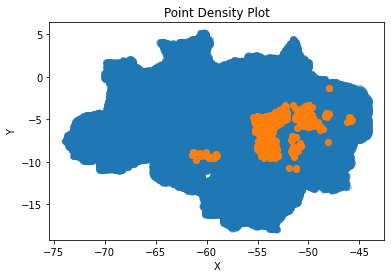

In [10]:
df_test = df_full[df_full.duplicated(['x', 'y', 'year'], keep=False)]

plt.scatter(df_full.x, df_full.y, alpha=0.3)
plt.scatter(df_test.x, df_test.y, alpha=0.7)


# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Point Density Plot')

# Display the plot
plt.show()

In [12]:
df_test

,Unnamed: 0,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,...,water,soybean,rice,other_crop,coffee,citrus,other_perennial,forest_lag,forest_diff,def
94,247411,1500602.0,0.0,9048907,-54.325,-6.675,2005,88.0,88.75,28.54479,...,0.000000,0.0,0.0,0.0,0,0,0.0,3.102540,0.000000,0.000000
116,421621,1502764.0,-18.0,9243282,-51.625,-8.925,2006,92.0,84.50,27.34295,...,0.000000,0.0,0.0,0.0,0,0,0.0,0.281132,0.019581,0.000000
268,89339,1502764.0,-6.0,9272090,-51.225,-8.525,2004,92.0,86.50,29.41027,...,0.000000,0.0,0.0,0.0,0,0,0.0,3.019645,-0.400112,0.400112
284,480654,5103254.0,47.0,8634748,-60.075,-9.325,2006,45.0,82.75,33.17370,...,0.000000,0.0,0.0,0.0,0,0,0.0,2.689931,-0.025021,0.025021
347,245019,1500602.0,0.0,9002117,-54.975,-5.025,2005,97.0,84.00,27.29967,...,0.000000,0.0,0.0,0.0,0,0,0.0,3.120969,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99635,274620,1505437.0,-6.0,9268518,-51.275,-7.125,2005,97.0,86.50,28.40042,...,0.000000,0.0,0.0,0.0,0,0,0.0,2.445884,-0.003549,0.003549
99652,250105,1500602.0,-24.0,9095751,-53.675,-5.275,2005,97.0,96.25,24.39760,...,0.000000,0.0,0.0,0.0,0,0,0.0,3.118441,0.000000,0.000000
99684,279102,1506187.0,-19.0,9477369,-48.375,-4.575,2005,64.0,64.75,27.62917,...,0.000000,0.0,0.0,0.0,0,0,0.0,3.124895,0.000000,0.000000
99757,89047,1502764.0,-36.0,9257672,-51.425,-9.425,2004,87.0,78.50,29.79175,...,0.000000,0.0,0.0,0.0,0,0,0.0,2.766724,-0.133046,0.133046


In [14]:
subset_cols = ['x', 'y', 'year']

# Find duplicated rows based on the subset of columns
duplicated_rows = df_full[df_full.duplicated(subset=subset_cols, keep=False)]

# Display the duplicated rows side by side for comparison
duplicated_rows_sorted = duplicated_rows.sort_values(by=subset_cols)
duplicated_rows_side_by_side = duplicated_rows_sorted.groupby(subset_cols).apply(lambda x: x.reset_index(drop=True))
#print(duplicated_rows_side_by_side)
duplicated_rows_side_by_side.head()


Unnamed: 0         ID  forest.diff      FID       x  \
x       y      year                                                          
-61.425 -9.175 2006 0      479748  5103254.0          4.0  8537537 -61.425   
                    1      479747  5103254.0          4.0  8537537 -61.425   
-61.375 -8.825 2006 0      479811  5103254.0          0.0  8541144 -61.375   
                    1      479812  5103254.0          0.0  8541144 -61.375   
-61.225 -9.025 2006 0      479946  5103254.0          0.0  8551940 -61.225   

                           y  year  forest.l  nn_forest.l     rain1  ...  \
x       y      year                                                  ...   
-61.425 -9.175 2006 0 -9.175  2006      93.0        95.25  29.71755  ...   
                    1 -9.175  2006      93.0        95.25  29.71755  ...   
-61.375 -8.825 2006 0 -8.825  2006      97.0        97.00  31.25063  ...   
                    1 -8.825  2006      97.0        97.00  31.25063  ...   
-61.225 -9.025 2006 0 -9.025  2006      97.0        95.00  30.25065  ...   

                          water  soybean  rice  other_crop  coffee  citrus  \
x       y      year                                                          
-61.425 -9.175 2006 0  0.000000      0.0   0.0         0.0       0       0   
                    1  0.000000      0.0   0.0         0.0       0       0   
-61.375 -8.825 2006 0  0.007953      0.0   0.0         0.0       0       0   
                    1  0.007953      0.0   0.0         0.0       0       0   
-61.225 -9.025 2006 0  0.000000      0.0   0.0         0.0       0       0   

                       other_perennial  forest_lag  forest_diff  def  
x       y      year                                                   
-61.425 -9.175 2006 0              0.0    3.065304          0.0  0.0  
                    1              0.0    3.065304          0.0  0.0  
-61.375 -8.825 2006 0              0.0    2.941158          0.0  0.0  
                    1              0.0    2.941158          0.0  0.0  
-61.225 -9.025 2006 0              0.0    3.067823          0.0  0.0  

[5 rows x 216 columns]

In [17]:
duplicated_rows_side_by_side.shape

(742, 216)

In [16]:
duplicated_rows_side_by_side.head(20)

Unnamed: 0         ID  forest.diff      FID       x  \
x       y      year                                                          
-61.425 -9.175 2006 0      479748  5103254.0          4.0  8537537 -61.425   
                    1      479747  5103254.0          4.0  8537537 -61.425   
-61.375 -8.825 2006 0      479811  5103254.0          0.0  8541144 -61.375   
                    1      479812  5103254.0          0.0  8541144 -61.375   
-61.225 -9.025 2006 0      479946  5103254.0          0.0  8551940 -61.225   
                    1      479945  5103254.0          0.0  8551940 -61.225   
-61.175 -9.025 2006 0      479994  5103254.0          0.0  8555540 -61.175   
                    1      479993  5103254.0          0.0  8555540 -61.175   
-61.075 -9.825 2006 0      480057  5103254.0          0.0  8562725 -61.075   
                    1      480058  5103254.0          0.0  8562725 -61.075   
-60.675 -9.025 2006 0      480403  5103254.0         -2.0  8591545 -60.675   
                    1      480404  5103254.0         -2.0  8591545 -60.675   
-60.575 -9.275 2006 0      480441  5103254.0         -2.0  8598741 -60.575   
                    1      480442  5103254.0         -2.0  8598741 -60.575   
-60.075 -9.325 2006 0      480654  5103254.0         47.0  8634748 -60.075   
                    1      480653  5103254.0         47.0  8634748 -60.075   
        -8.875 2006 0      480672  5103254.0         -3.0  8634757 -60.075   
                    1      480671  5103254.0         -3.0  8634757 -60.075   
-60.025 -9.375 2006 0      480676  5103254.0         -5.0  8638347 -60.025   
                    1      480675  5103254.0         -5.0  8638347 -60.025   

                           y  year  forest.l  nn_forest.l     rain1  \
x       y      year                                                   
-61.425 -9.175 2006 0 -9.175  2006      93.0        95.25  29.71755   
                    1 -9.175  2006      93.0        95.25  29.71755   
-61.375 -8.825 2006 0 -8.825  2006      97.0        97.00  31.25063   
                    1 -8.825  2006      97.0        97.00  31.25063   
-61.225 -9.025 2006 0 -9.025  2006      97.0        95.00  30.25065   
                    1 -9.025  2006      97.0        95.00  30.25065   
-61.175 -9.025 2006 0 -9.025  2006      97.0        81.25  30.61183   
                    1 -9.025  2006      97.0        81.25  30.61183   
-61.075 -9.825 2006 0 -9.825  2006      91.0        90.00  30.96010   
                    1 -9.825  2006      91.0        90.00  30.96010   
-60.675 -9.025 2006 0 -9.025  2006      97.0        97.00  31.07473   
                    1 -9.025  2006      97.0        97.00  31.07473   
-60.575 -9.275 2006 0 -9.275  2006      97.0        96.25  32.65541   
                    1 -9.275  2006      97.0        96.25  32.65541   
-60.075 -9.325 2006 0 -9.325  2006      45.0        82.75  33.17370   
                    1 -9.325  2006      45.0        82.75  33.17370   
        -8.875 2006 0 -8.875  2006      95.0        87.00  32.37560   
                    1 -8.875  2006      95.0        87.00  32.37560   
-60.025 -9.375 2006 0 -9.375  2006      97.0        93.50  32.90968   
                    1 -9.375  2006      97.0        93.50  32.90968   

                       elevation  slope  aspect  near_mines  near_roads  \
x       y      year                                                       
-61.425 -9.175 2006 0      142.0    1.0   112.0   141301.70  125993.500   
                    1      142.0    1.0   112.0   141301.70  125993.500   
-61.375 -8.825 2006 0      127.0    1.0   219.0   103724.50   99672.970   
                    1      127.0    1.0   219.0   103724.50   99672.970   
-61.225 -9.025 2006 0      137.0    0.0   143.0   117804.50   98194.060   
                    1      137.0    0.0   143.0   117804.50   98194.060   
-61.175 -9.025 2006 0      127.0    0.0   321.0   116306.20   94120.820   
                    1      127.0    0.0   321.0   116306.20   94120.

<Axes: >

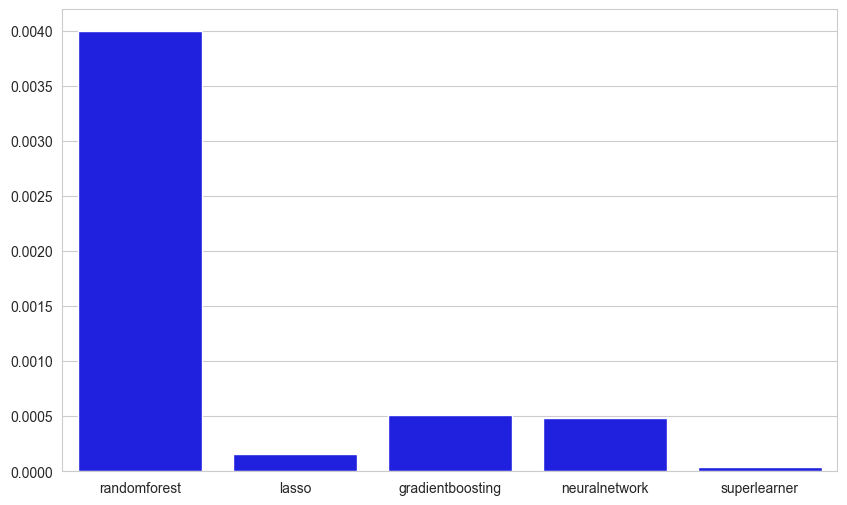

In [ ]:
file_path = FILE_PATH + '/performance.txt'
with open(file_path, "r") as file:
    lines = file.readlines()

content_list = [line.strip() for line in lines][2:]
split_list = [s.split(' MSE: ') for s in content_list]

labels = [e[0] for e in split_list]
values = [float(e[1]) for e in split_list]

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=values, x=labels, color='blue', orient = 'v')


In [ ]:
values

[0.003996678030490013,
 0.0001577119711700281,
 0.0005126619858697259,
 0.0004796600448663341,
 3.938500153292077e-05]

In [ ]:
def plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = True, use_abs = True):
    file_path = FILE_PATH + 'FeatureImportance/' + method + '.csv'

    df = pd.read_csv(file_path, index_col=0)
    file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_' + method

    if not INCLUDE_FOREST:
        df = df[~df.Feature.isin(['forest_lag', 'forest_formation'])]
        file_path_save = FILE_PATH + 'FeatureImportance/' + 'features_exclude_forest_vars_' + method

    abs_sum = df['Coeff'].abs().sum()
    df['Coeff'] = df['Coeff'] / abs_sum

    coeff_values = df['Coeff'].head(10)
    feature_labels = df['Feature'].head(10)

    if abs:
        coeff_values = (abs(coeff_values))

    sns.set_style('whitegrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coeff_values, y=feature_labels, color='green')

    # Set plot title and labels
    plt.title(FOLDER_NAME + ' ' + method.upper() )
    #plt.xlabel('Abs')
    #plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig(file_path_save)
    if SHOW: plt.show()

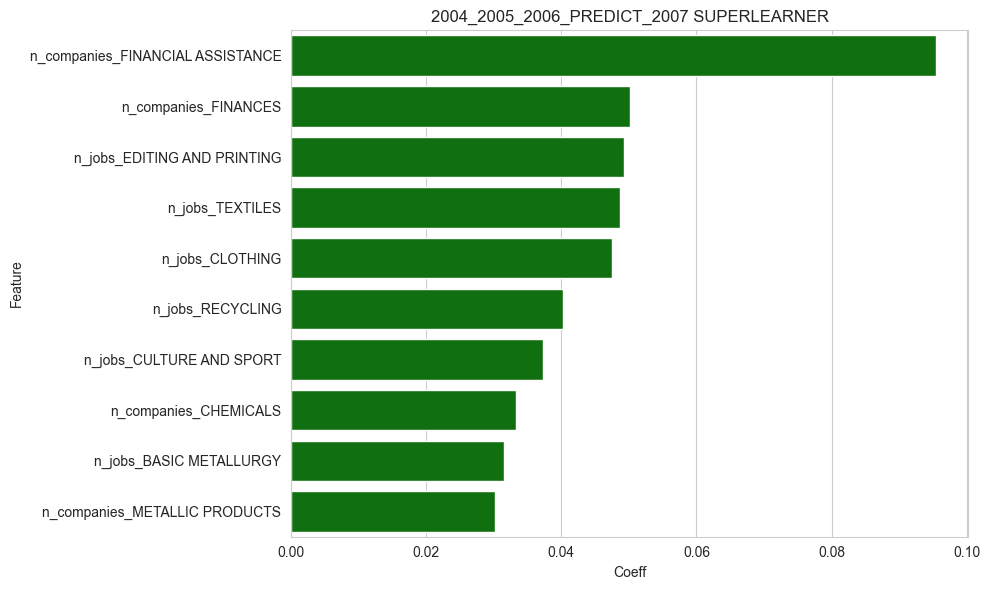

In [ ]:
plot_feature_importance(FILE_PATH, FOLDER_NAME, method, SHOW = True, INCLUDE_FOREST = False, use_abs = True)

In [ ]:
df.head()

,Feature,Coeff
203,forest_lag,-0.479329
187,forest_formation,0.479158
37,n_companies_FINANCIAL ASSISTANCE,-0.003964
45,n_companies_FINANCES,0.002084
94,n_jobs_EDITING AND PRINTING,0.002048


In [ ]:
dict(zip(get_x_cols(), np.repeat(np.nan, len(get_x_cols()))))

{'year': nan,
 'rain1': nan,
 'elevation': nan,
 'slope': nan,
 'aspect': nan,
 'near_mines': nan,
 'near_roads': nan,
 'near_hidrovia': nan,
 'indigenous_homol': nan,
 'mun_election_year': nan,
 'new_forest_code': nan,
 'lula': nan,
 'dilma': nan,
 'temer': nan,
 'bolsonaro': nan,
 'fed_election_year': nan,
 'populacao': nan,
 'pib_pc': nan,
 'ironore': nan,
 'silver': nan,
 'copper': nan,
 'gold': nan,
 'soy_price': nan,
 'beef_price': nan,
 'ag_jobs': nan,
 'mining_jobs': nan,
 'public_jobs': nan,
 'construction_jobs': nan,
 'PIB': nan,
 'n_companies_PUBLIC ADMIN': nan,
 'n_companies_AGRICULTURE': nan,
 'n_companies_FOOD AND DRINKS': nan,
 'n_companies_ACCOMODATION AND FOOD': nan,
 'n_companies_EQUIPMENT RENTAL': nan,
 'n_companies_WHOLESALE': nan,
 'n_companies_ASSOCIATIVE ACTIVITIES': nan,
 'n_companies_AUTOMOBILES AND TRANSPORT': nan,
 'n_companies_FINANCIAL ASSISTANCE': nan,
 'n_companies_TRADE REP VEHICLES': nan,
 'n_companies_CONSTRUCTION': nan,
 'n_companies_MAIL AND TELECOM'